In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import simlib
from importlib import reload


engine 1 started
engine 1 detached
engine 2 started
engine 2 detached
==== TOO MUCH STEPS ====
MIN DISTANCE: 466685.0712804615 m


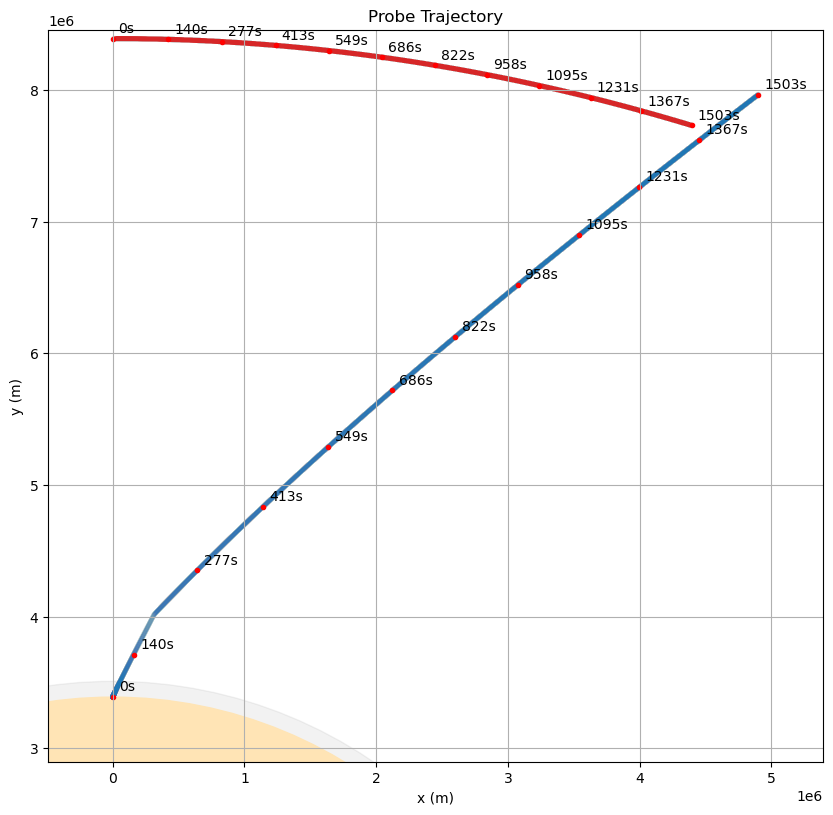

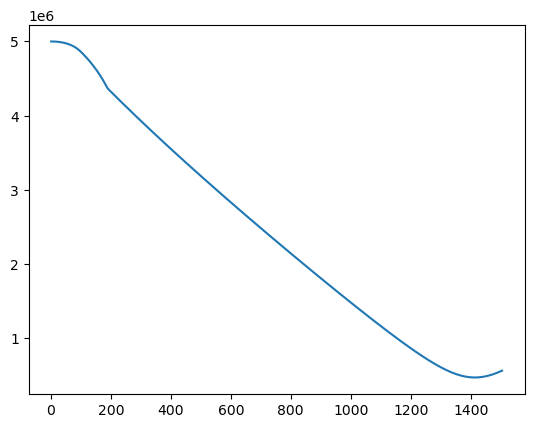

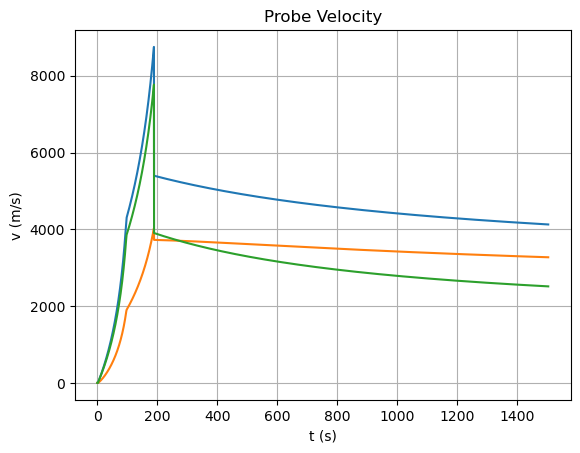

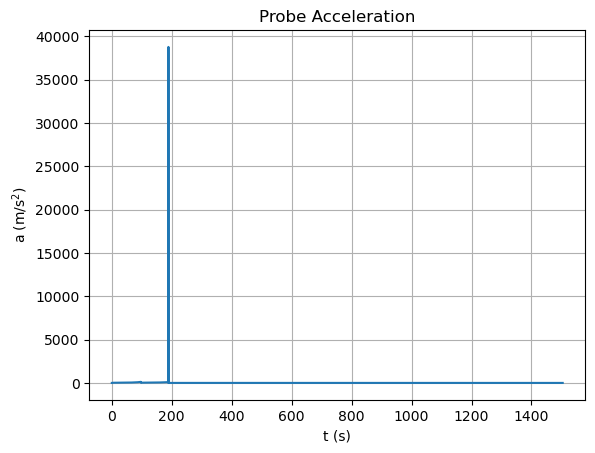

In [101]:
reload(simlib)

MAX_STEPS = 15000
mars = simlib.Mars

p0 = (0, mars.radius + 5000e3) # (x0 (m), y0 (degrees))
v0 = (3000, 0) # 
asteroid = simlib.SpaceCraft(300, p0, v0, (0,0), 0, gridsize_min=300)

h1 = 100
p1 = (0, mars.radius + h1) # (x0 (m), y0 (degrees))
theta1 = -13
v1 = np.array((np.cos(np.deg2rad(theta1 + 90)), np.sin(np.deg2rad(theta1 + 90)))) * 0.01 # 
rocket = simlib.SpaceCraft(1, p1, v1, (0,0), 0, gridsize_min=10, max_dt=1,engines=((simlib.ariane_double_booster, 500e3),
                                                                            (simlib.ariane_stage1, 30e3),
                                                                            #(simlib.ariane_stage2, 14.9e3),
                                                                          ))
all_distance = list()
step_nb = 0
while True:
    step_nb += 1
    
    P0, R0, g0, h0 = mars.get_PRgh(asteroid.p, asteroid.v)
    P1, R1, g1, h1 = mars.get_PRgh(rocket.p, rocket.v)
    if h1 < 110:
        g1 = 0
    
    if rocket.t > 1:
        rocket.start_thruster()
        
        

    dt = rocket.update(P1, R1, g1)
    asteroid.update(P0, R0, g0, dt=dt)
    

    distance = np.sqrt(np.sum((rocket.p - asteroid.p)**2))
    all_distance.append(float(distance))
    
    if step_nb > MAX_STEPS:
        print('==== TOO MUCH STEPS ====')
        break

    if h0 < 0:
        print('==== asteroid CRASHED !! ====')
        break

    if h1 < 0:
        print('==== rocket CRASHED !! ====')
        break

    if distance < 10e3:
        print('SUCCESS !!!')
        break

    #if h1 > h0 + 1000e3:
    #    print('==== rocket GOT TOO FAR ====')
    #    break
        
print(f'MIN DISTANCE: {np.min(all_distance)} m')
asteroid.plot_trajectory(mars, color='tab:red')
rocket.plot_trajectory(mars, overplot=True)

plt.figure()
plt.plot(np.cumsum(rocket.all_t[1:]), all_distance)


rocket.plot_velocity()
rocket.plot_acceleration()




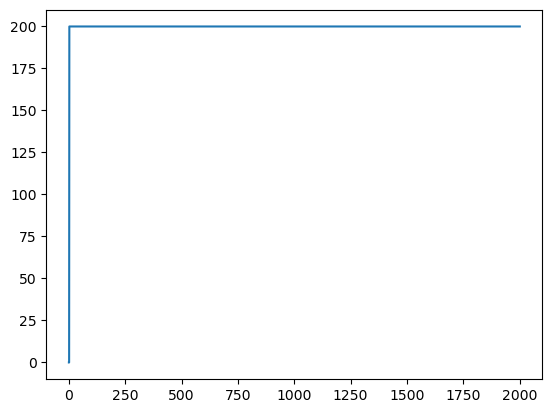

In [22]:
plt.plot(rocket.all_thrust)